In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

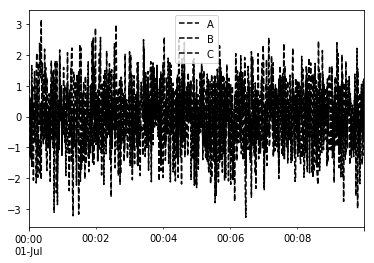

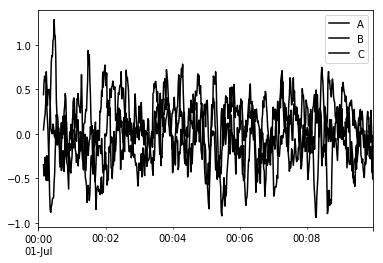

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/collinlyou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.114343,0.096814,-0.003307
2016-07-01 00:00:02,0.264070,-0.427211,0.223014
2016-07-01 00:00:03,0.246992,-0.376896,0.075031
2016-07-01 00:00:04,-0.176811,-0.193546,-0.061393
2016-07-01 00:00:05,0.077128,-0.514196,0.326115
2016-07-01 00:00:06,0.100382,-0.209584,0.342528
2016-07-01 00:00:07,0.077621,-0.150070,0.394008
2016-07-01 00:00:08,0.140747,-0.491429,0.487922
2016-07-01 00:00:09,0.016451,-0.406288,0.565948


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,1.776172,0.155502,-0.196561,-1.469876
2016-06-07,-0.445246,-0.383325,1.244335,-1.100498
2016-06-08,-0.589273,-1.533880,0.526307,0.457472
2016-06-09,-0.542539,-1.223223,0.137218,1.770102
2016-06-10,0.959306,-0.152370,0.271959,0.441943


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f84d390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f9d0358>], dtype=object)

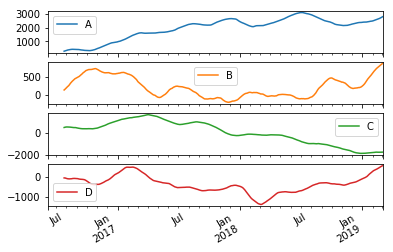

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.983065,1.279765,1.583404,1.279069


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.553549,-0.036160,0.425607,-2.020125
2016-06-08,1.282917,-0.611341,0.808431,-2.051050
2016-06-09,1.011967,-1.204737,1.034148,-1.623988
2016-06-10,1.041258,-1.591249,1.223970,-1.279362


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

An expanding window is a rolling window that gets larger over time (the window approaches the time series itself). As a result, it will become a more stable statistic than a rolling window over time even though it won't necessarily reflect the time series as closely.

One would use an expanding window when one wants to still factor in previous data rather than discard it. One would use a rolling window to get a smooth approximation of the time series.

In [12]:
# EWMA
# Why use EWMA?

In situations where an arithmetic moving average (rolling window mean) is not considered appropriate, one would use an exponential moving average 

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [14]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [15]:
air_passengers = pd.read_csv("./data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


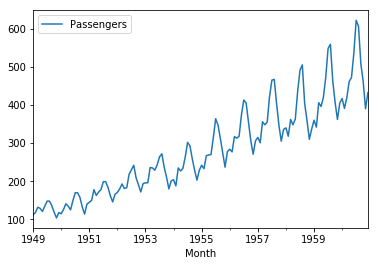

In [16]:
air_passengers.plot()

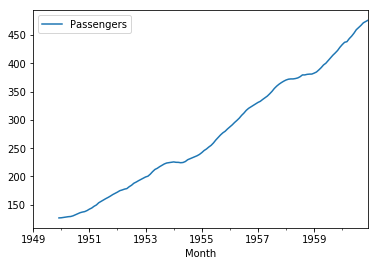

In [17]:
air_passengers.rolling(window = 12).mean().plot()

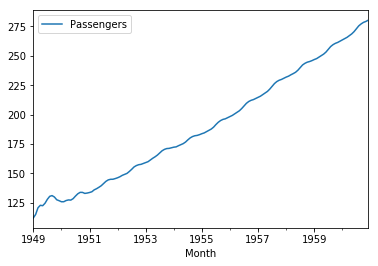

In [18]:
air_passengers.expanding(min_periods = 1).mean().plot()

/Users/collinlyou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=12,min_periods=1,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


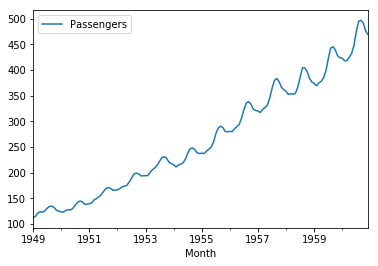

In [19]:
pd.ewma(air_passengers, span = 12, min_periods = 1).plot()